<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 2

**Executive Program in Algorithmic Trading**

**_Event-Based Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="https://home.tpq.io/certificates/pyalgo" target="_blank"><img src="https://hilpisch.com/pyalgo_cover_shadow.png" width="300px" align="left"></a>

## Basic Imports

In [1]:
import math
import numpy as np
import pandas as pd
from pylab import plt
# import cufflinks
np.set_printoptions(suppress=True)
# cufflinks.set_config_file(offline=True)
plt.style.use('seaborn-v0_8')
pd.set_option('mode.chained_assignment', None)
%config InlineBackend.figure_format = 'svg'

## Reading Financial Data

In [2]:
url = 'http://certificate.tpq.io/findata.csv'  # EOD data
# url = 'http://hilpisch.com/aiif_eikon_id_data.csv'  # intraday data

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)# .dropna()

In [4]:
raw.dropna(inplace=True)

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2518 non-null   float64
 1   MSFT.O  2518 non-null   float64
 2   INTC.O  2518 non-null   float64
 3   AMZN.O  2518 non-null   float64
 4   GS.N    2518 non-null   float64
 5   .SPX    2518 non-null   float64
 6   .VIX    2518 non-null   float64
 7   SPY     2518 non-null   float64
 8   EUR=    2518 non-null   float64
 9   XAU=    2518 non-null   float64
 10  GDX     2518 non-null   float64
 11  GLD     2518 non-null   float64
dtypes: float64(12)
memory usage: 255.7 KB


In [6]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,.SPX,.VIX,SPY,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2013-01-02,19.608195,27.62,21.38,12.86550,131.66,1462.42,14.68,146.0600,1.3184,1686.35,47.1000,163.17
2013-01-03,19.360548,27.25,21.32,12.92400,130.94,1459.37,14.56,145.7341,1.3046,1662.95,45.1403,161.20
2013-01-04,18.821410,26.74,21.16,12.95750,134.51,1466.47,13.83,146.3700,1.3067,1656.24,45.3300,160.44
2013-01-07,18.710696,26.69,21.25,13.42296,134.26,1461.89,13.79,145.9695,1.3115,1646.64,44.4800,159.43
2013-01-08,18.761053,26.55,21.09,13.31900,133.05,1457.15,13.62,145.5496,1.3080,1658.60,44.6500,160.56


In [7]:
rets = np.log(raw / raw.shift(1)).dropna()  # log returns

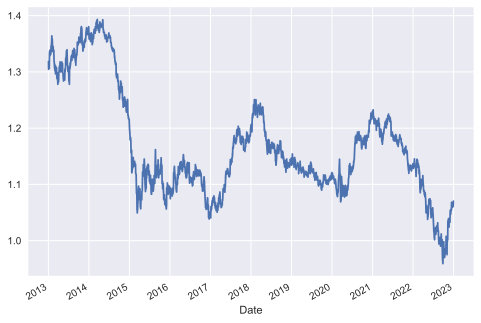

In [8]:
raw['EUR='].plot();

## SMA-Based Strategy

In [10]:
symbol = "EUR="

In [19]:
data = pd.DataFrame(raw[symbol])

In [20]:
data["SMA1"] = data[symbol].rolling(42).mean()

In [21]:
data["SMA2"] = data[symbol].rolling(252).mean()

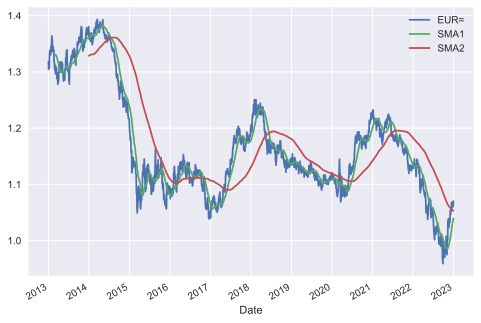

In [22]:
data.plot();

In [ ]:
data["p"] = np.where(data["SMA1"] > data["SMA2"],1,-1)

In [ ]:
data.plot(secondary_y="p");

In [29]:
data["r"] = np.log(data[symbol] / data[symbol].shift(1))

In [30]:
data.dropna(inplace=True)

In [31]:
data.head()

,EUR=,SMA1,SMA2,p,r
Date,,,,,
2013-12-31,1.3745,1.359921,1.328547,1,-0.004211
2014-01-02,1.3670,1.360131,1.328740,1,-0.005471
2014-01-03,1.3587,1.360374,1.328954,1,-0.006090
2014-01-06,1.3627,1.360645,1.329177,1,0.002940
2014-01-07,1.3615,1.360981,1.329375,1,-0.000881


In [33]:
data["s"] = data["p"].shift(1) * data["r"]

In [34]:
data.head()

,EUR=,SMA1,SMA2,p,r,s
Date,,,,,,
2013-12-31,1.3745,1.359921,1.328547,1,-0.004211,NaN
2014-01-02,1.3670,1.360131,1.328740,1,-0.005471,-0.005471
2014-01-03,1.3587,1.360374,1.328954,1,-0.006090,-0.006090
2014-01-06,1.3627,1.360645,1.329177,1,0.002940,0.002940
2014-01-07,1.3615,1.360981,1.329375,1,-0.000881,-0.000881


In [35]:
data.dropna(inplace=True)

In [38]:
data[["r","s"]].sum().apply(np.exp) # gross returns

r    0.778610
s    1.363764
dtype: float64

In [39]:
data[["r","s"]].sum().apply(np.exp) - 1 # net returns

r   -0.221390
s    0.363764
dtype: float64

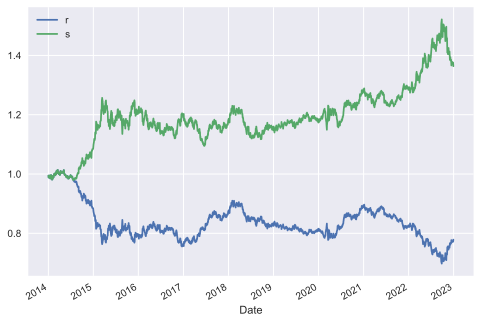

In [40]:
data[["r","s"]].cumsum().apply(np.exp).plot(); # gross returns over time

## Excursion: Log vs Simple Returns

In [43]:
S0 = 100
S1 = 110

In [44]:
# Gross Simple Return
S1 / S0

1.1

In [50]:
# Net Simple Return
(S1 - S0) / S0

0.1

In [55]:
S1 / S0 - 1

0.10000000000000009

In [51]:
# Net Log Return
lr = math.log(S1/S0)
lr

0.09531017980432493

In [52]:
math.exp(lr) # gross (simple) return

1.1

In [53]:
math.exp(lr)-1 # net (simple) return

0.10000000000000009

## Event-Based View

In [67]:
import time
import random

In [68]:
data = pd.DataFrame(raw[symbol])

In [69]:
#data.plot();

In [71]:
# what is symbol type? why no quotes when looking up? -- because a series
type(data[symbol])

pandas.core.series.Series

In [70]:
for bar in range(10):
    print(bar, data.index[bar], data[symbol].iloc[bar])
    time.sleep(random.random())

0 2013-01-02 00:00:00 1.3184
1 2013-01-03 00:00:00 1.3046
2 2013-01-04 00:00:00 1.3067
3 2013-01-07 00:00:00 1.3115
4 2013-01-08 00:00:00 1.308
5 2013-01-09 00:00:00 1.3063
6 2013-01-10 00:00:00 1.3269
7 2013-01-11 00:00:00 1.3343
8 2013-01-14 00:00:00 1.3382
9 2013-01-15 00:00:00 1.3303


## `FinancialData` Class

In [82]:
class FinancialData:
    url = 'https://certificate.tpq.io/findata.csv'
    def __init__(self, symbol):
        self.symbol = symbol
        self.retrieve_data()
        self.prepare_data()
    def retrieve_data(self):
        self.raw = pd.read_csv(self.url, index_col=0, parse_dates=True)
    def prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol]).dropna()
        self.data['r'] = np.log(self.data / self.data.shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(title=self.symbol)

## `BacktestingBase` Class

In [428]:
class BacktestingBase(FinancialData):
    def __init__(self, symbol, amount):
        super().__init__(symbol)
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
    def get_date_price(self, bar):
        date = str(self.data.index[bar])[:10]
        price = self.data[self.symbol].iloc[bar]
        return date, price
    def print_balance(self, bar):
        date, price = self.get_date_price(bar)
        print(f'{date} | current balance = {self.current_balance:.2f}')
    def print_net_wealth(self, bar):
        date, price = self.get_date_price(bar)
        net_wealth = self.current_balance - self.initial_balance
        print(f'{date} | net wealth = {net_wealth:.2f}')
    def place_buy_order(self, bar=None, units=None, amount=None):
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount/price)
        self.current_balance -= units * price
        self.units += units
        self.entry_price = price  # last order price
        self.trades += 1
        print(55 * "=")
        print(f'{date} | bought {units} units for {price} (new balance {self.units})')
        self.print_balance(bar)
        self.print_net_wealth(bar)
    def place_sell_order(self, bar=None, units=None, amount=None):
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount/price)
        self.current_balance += units * price
        self.units -= units
        self.entry_price = price # last order price
        self.trades += 1
        print(55 * "=")
        print(f'{date} | sold {units} units for {price} (new balance {self.units})')
        self.print_balance(bar)
        self.print_net_wealth(bar)
    def close_out(self, bar):
        date, price = self.get_date_price(bar)
        print(55 * '=')
        print(f'*** CLOSING OUT ***')
        print(f'{date} | current position {self.units}')
        print(f'{date} | closing out {self.units} units for {price}')
        self.current_balance += self.units * price
        self.units = 0
        self.print_balance(bar)
        self.print_net_wealth(bar)
        perf = (self.current_balance / self.initial_balance - 1) * 100
        print(f'performance[%] = {perf:3f}')
        print(f'trades = {self.trades}')

In [429]:
bb = BacktestingBase("EUR=", 10000)

In [430]:
bb.get_date_price(100)

('2013-05-21', 1.2905)

In [431]:
bb.print_balance(100)

2013-05-21 | current balance = 10000.00


In [432]:
bb.place_buy_order(200, units=1000)

2013-10-08 | bought 1000 units for 1.3571 (new balance 1000)
2013-10-08 | current balance = 8642.90
2013-10-08 | net wealth = -1357.10


In [433]:
bb.units

1000

In [434]:
bb.place_buy_order(1250, units=377)

2017-10-17 | bought 377 units for 1.1766 (new balance 1377)
2017-10-17 | current balance = 8199.32
2017-10-17 | net wealth = -1800.68


In [435]:
bb.units

1377

In [436]:
bb.place_sell_order(200, units=377)

2013-10-08 | sold 377 units for 1.3571 (new balance 1000)
2013-10-08 | current balance = 8710.95
2013-10-08 | net wealth = -1289.05


In [437]:
bb.units

1000

In [438]:
bb.close_out(bar=200)

*** CLOSING OUT ***
2013-10-08 | current position 1000
2013-10-08 | closing out 1000 units for 1.3571
2013-10-08 | current balance = 10068.05
2013-10-08 | net wealth = 68.05
performance[%] = 0.680485
trades = 3


We are going to implement a **base class** for event-based backtesting with:

* `__init__`
* `retrieve_data` (`FinancialData`)
* `prepare_data` (`FinancialData`)
* `plot_data` (`FinancialData`)
* `get_date_price`
* `print_balance`
* `print_net_wealth`
* `place_buy_order`
* `place_sell_order`
* `close_out`

## `SMABacktester` Class

In [442]:
# Inherit from BacktestingBase
class SMABacktester(BacktestingBase):
    def prepare_statistics(self):
        self.data["SMA1"] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data["SMA2"] = self.data[self.symbol].rolling(self.SMA2).mean()
    # sl = stop loss
    def backtest_strategy(self, SMA1, SMA2, units, sl=None, wait=5): # timeout wait default is 5 bars or trading periods
        self.SMA1, self.SMA2 = SMA1, SMA2
        self.prepare_statistics()
        self.wait = 0 # time-out parameter if we hit a stop-loss
        self.units = 0
        self.trades = 0
        self.position = 0
        self.current_balance = self.initial_balance
        
        print(55 * "=")
        print("*** START BACKTEST ***")
        print(f'SYM={self.symbol} | SMA1={self.SMA1} | SMA2={self.SMA2} | Units={units}')
        print(55 * "=")
        
        for bar in range(SMA2 - 1, len(self.data)):
            
            # If stop loss hit, we must wait before next trade (time-out)
            # Wait to trade time-out is counting down to zero
            if self.wait != 0:
                self.wait -= 1
            
            date, price = self.get_date_price(bar)
            
            # Stop Loss Code (sl = stop loss, rc = return current
            ################
            # only allowed to trade if waiut timeout is zero
            if sl is not None and self.position !=0 and self.wait == 0:
                rc = price / self.entry_price - 1
                if self.position == 1 and rc < -sl:
                    print(55 * "=")
                    print(f'{date} | STOP LOSS HIT | Closing LONG Position | Loss of {rc * 100:.2f} %')
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
                    self.wait = wait
                elif self.position == -1 and rc > sl:
                    print(55 * "=")
                    print(f'{date} | STOP LOSS HIT | Closing SHORT Position | Loss of {rc * 100:.2f} %')
                    self.place_buy_order(bar, units=self.units)
                    self.position = 0
                    self.wait = wait
            
            # Trade the Signal
            ##################
            signal = 1 if self.data["SMA1"].iloc[bar] > self.data["SMA2"].iloc[bar] else -1
            # only allowed to trade if waiut timeout is zero
            if self.position in [0, -1] and signal == 1 and self.wait == 0:
                # If neutral or short then place a buy order => going long
                # if short then buy x2 lots of units i.e. close the short and go long
                self.place_buy_order(bar, units=(1-self.position) * units) 
                self.position = 1
            # only allowed to trade if waiut timeout is zero
            elif self.position in [0, 1] and signal == -1 and self.wait ==0: # only allowed to trade if waiut timeout is zero
                # if neutral or long thenplace a sell order => going short
                # if long then sell x2 lots of units i.e. close the long and go short
                self.place_sell_order(bar, units=(1+self.position) * units)
                self.position = -1

        self.close_out(bar)

In [443]:
sma = SMABacktester("EUR=", 1000)

In [444]:
sma.backtest_strategy(SMA1=42, SMA2=252, units=50)

*** START BACKTEST ***
SYM=EUR= | SMA1=42 | SMA2=252 | Units=50
2013-12-18 | bought 50 units for 1.3683 (new balance 50)
2013-12-18 | current balance = 931.59
2013-12-18 | net wealth = -68.41
2014-07-16 | sold 100 units for 1.3525 (new balance -50)
2014-07-16 | current balance = 1066.84
2014-07-16 | net wealth = 66.84
2016-03-17 | bought 100 units for 1.1317 (new balance 50)
2016-03-17 | current balance = 953.67
2016-03-17 | net wealth = -46.33
2016-11-04 | sold 100 units for 1.1135 (new balance -50)
2016-11-04 | current balance = 1065.02
2016-11-04 | net wealth = 65.02
2017-05-30 | bought 100 units for 1.1183 (new balance 50)
2017-05-30 | current balance = 953.19
2017-05-30 | net wealth = -46.81
2018-06-11 | sold 100 units for 1.1782 (new balance -50)
2018-06-11 | current balance = 1071.01
2018-06-11 | net wealth = 71.01
2020-06-24 | bought 100 units for 1.125 (new balance 50)
2020-06-24 | current balance = 958.51
2020-06-24 | net wealth = -41.49
2021-07-23 | sold 100 units for 1.1771

In [424]:
sma.data.head()

,EUR=,r,SMA1,SMA2
Date,,,,
2013-01-01,1.3204,NaN,NaN,NaN
2013-01-02,1.3184,-0.001516,NaN,NaN
2013-01-03,1.3046,-0.010522,NaN,NaN
2013-01-04,1.3067,0.001608,NaN,NaN
2013-01-07,1.3115,0.003667,NaN,NaN


In [425]:
sma.data.tail()

,EUR=,r,SMA1,SMA2
Date,,,,
2022-12-26,1.0635,0.001977,1.035252,1.051777
2022-12-27,1.0638,0.000282,1.036860,1.051491
2022-12-28,1.0608,-0.002824,1.038586,1.051207
2022-12-29,1.0661,0.004984,1.040460,1.050928
2022-12-30,1.0702,0.003838,1.042567,1.050635


In [426]:
# New Backtest
sma = SMABacktester("EUR=", 1000)

In [427]:
sma.backtest_strategy(SMA1=42, SMA2=252, units=50, sl=0.01)

*** START BACKTEST ***
SYM=EUR= | SMA1=42 | SMA2=252 | Units=50
2013-12-18 | bought 50 units for 1.3683 (new balance 50)
2013-12-18 | current balance = 931.59
2013-12-18 | net wealth = -68.41
2014-01-17 | STOP LOSS HIT | Closing LONG Position | Loss of -1.05 %
2014-01-17 | sold 50 units for 1.3539 (new balance 0)
2014-01-17 | current balance = 999.28
2014-01-17 | net wealth = -0.72
2014-01-24 | bought 50 units for 1.3675 (new balance 50)
2014-01-24 | current balance = 930.91
2014-01-24 | net wealth = -69.09
2014-01-31 | STOP LOSS HIT | Closing LONG Position | Loss of -1.39 %
2014-01-31 | sold 50 units for 1.3485 (new balance 0)
2014-01-31 | current balance = 998.33
2014-01-31 | net wealth = -1.67
2014-02-07 | bought 50 units for 1.3633 (new balance 50)
2014-02-07 | current balance = 930.17
2014-02-07 | net wealth = -69.83
2014-07-16 | sold 100 units for 1.3525 (new balance -50)
2014-07-16 | current balance = 1065.41
2014-07-16 | net wealth = 65.41
2016-03-17 | bought 100 units for 1.13

In [446]:
# The quantstats package requires that we add a strategy returns column and an index
import quantstats as qs

## `SMABacktester` Class (incl. SL)

Stop loss (SL) applied to the SMABacktester above

<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>